<a href="https://colab.research.google.com/github/CanariosHernandezArturoManuel/Proyecto-Prototipico/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

tratamiento = pd.DataFrame({"Precio min" : [48,12,112,677,68,98,101,30,92,48,316,908,64,208,57,698,116,11.5,4,1.4,10.5,42.5,20,22.5,15,119,42.5,15,12.5,19.5],

                            "Precio max" : [111.99,57.59,112,677,677,682.88,1111,564,667,258,653,908,564,986,718,705,496,20,30,14,155,64,65,72,82,185,91.5,245,284,52]})
tratamiento



,Precio min,Precio max
0,48.0,111.99
1,12.0,57.59
2,112.0,112.00
3,677.0,677.00
4,68.0,677.00
5,98.0,682.88
6,101.0,1111.00
7,30.0,564.00
8,92.0,667.00
9,48.0,258.00


In [ ]:
escalador = MinMaxScaler().fit(tratamiento.values)

tratamiento = pd.DataFrame(escalador.transform(tratamiento.values),
                           columns=["Precio min", "Precio max"])
kmeans = KMeans(n_clusters=3).fit(tratamiento.values)
kmeans.labels_

array([1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
tratamiento["cluster"] = kmeans.labels_
tratamiento

,Precio min,Precio max,cluster
0,0.051401,0.089325,1
1,0.011692,0.039736,1
2,0.121994,0.089335,1
3,0.745202,0.604376,2
4,0.073461,0.604376,0
5,0.106552,0.609736,0
6,0.109861,1.000000,0
7,0.031546,0.501367,0
8,0.099934,0.595260,0
9,0.051401,0.222425,1


In [ ]:
print(kmeans.cluster_centers_, kmeans.inertia_)

[[0.12530333 0.63617867]
 [0.0345246  0.08907073]
 [0.83785572 0.68307505]] 0.5403025171148503


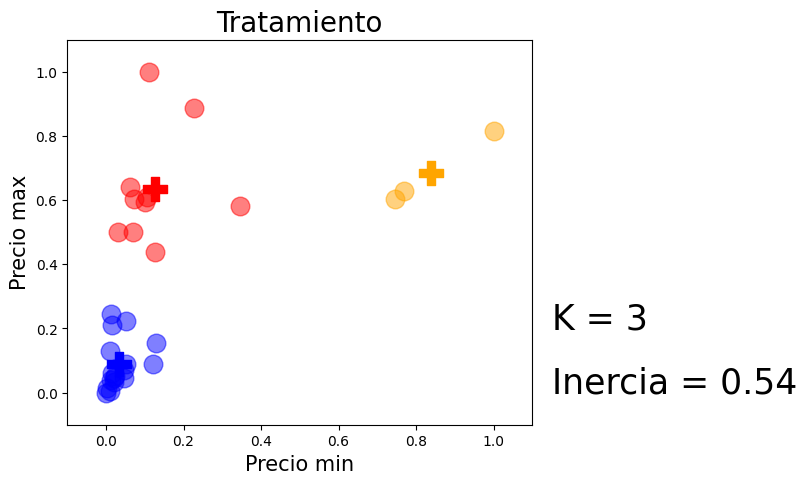

In [ ]:
plt.figure(figsize=(6,5), dpi=100)
colores = ["red","blue","orange","black","purple","pink","brown"]

for cluster in range(kmeans.n_clusters):
  plt.scatter(tratamiento[tratamiento["cluster"] == cluster]["Precio min"],
              tratamiento[tratamiento["cluster"] == cluster]["Precio max"],
              marker="o", s=180, color=colores[cluster], alpha=0.5)
  plt.scatter(kmeans.cluster_centers_[cluster][0],
              kmeans.cluster_centers_[cluster][1],
              marker="P", s=280, color=colores[cluster])

plt.title("Tratamiento", fontsize=20)
plt.xlabel("Precio min", fontsize=15)
plt.ylabel("Precio max", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

del tratamiento["cluster"]

In [ ]:
print(tratamiento.describe())

       Precio min  Precio max
count   30.000000   30.000000
mean     0.145117    0.330840
std      0.248723    0.304902
min      0.000000    0.000000
25%      0.016242    0.055150
50%      0.051401    0.216500
75%      0.118961    0.602097
max      1.000000    1.000000
